Automatically created module for IPython interactive environment


c:\python37\opencv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


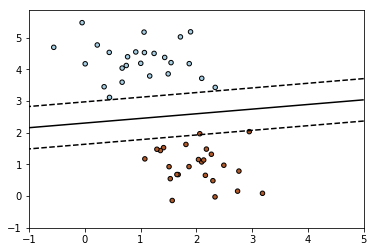

In [1]:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_separating_hyperplane.html#sphx-glr-auto-examples-linear-model-plot-sgd-separating-hyperplane-py

# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
print(__doc__)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)

clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor='black', s=20)

plt.axis('tight')
plt.show()

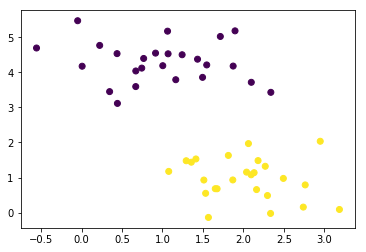

In [8]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [12]:
print(clf.predict([[2., 4.]]))
print(clf.predict([[2., 1.]]))

[0]
[1]


In [13]:
print(clf.coef_)
print(clf.intercept_)

[[ 0.220045  -1.5109837]]
[3.53569128]


Automatically created module for IPython interactive environment


c:\python37\opencv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


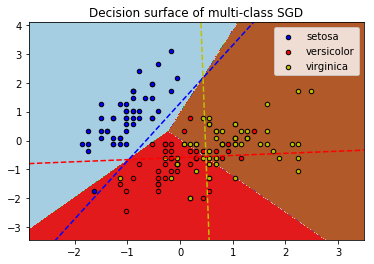

In [14]:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html#sphx-glr-auto-examples-linear-model-plot-sgd-iris-py
print(__doc__)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
colors = "bry"

# shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # step size in the mesh

clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

# Linear Example

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import numpy as np

X, Y = make_blobs(n_samples=200, n_features=5, centers=3, random_state=0, cluster_std=0.60)
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)

clf.fit(X, Y)


fig, ax = plt.subplots(2,1)
ax[0].scatter(X[:,0], X[:,1], c=Y)

# np.set_printoptions(precision=2)
# np.set_printoptions(suppress=True)
print(clf.coef_)
print(clf.intercept_)



print()
print(clf.predict([X[1,:]]))
print(Y[1])
x = X[1,:]
W = clf.coef_
b = clf.intercept_
yhat = np.matmul(W, x) + b
print(yhat)

# BoVW

Starting ...
Unpacking b'training batch 1 of 5'
Unpacking b'training batch 2 of 5'
Unpacking b'training batch 3 of 5'
Unpacking b'training batch 4 of 5'
Unpacking b'training batch 5 of 5'
Unpacking b'testing batch 1 of 1'
x_train.shape =  (3072, 50000)
y_train.shape =  (10, 50000)
n_train.shape =  (50000,)
x_test.shape =  (3072, 10000)
Done.
x_train.shape =  (3072, 1000)
Num. descriptors found =  13061
(128, 13061)
13061
(10, 13061)
13061
[2, 5, 4, 3, 9, 9, 6, 9, 3, 2, 8, 1, 8, 0, 6, 4, 9, 9, 0, 8, 3, 6, 0, 4, 3, 6, 5, 2, 7, 8, 0, 0, 0, 1, 2, 7, 4, 1, 3, 6, 2, 2, 1, 5, 8, 5, 4, 9, 8, 4, 6, 9, 6, 9, 5, 1, 2, 9, 7, 8, 2, 0, 4, 8, 6, 4, 1, 4, 1, 7, 0, 9, 5, 7, 8, 9, 3, 3, 0, 2, 9, 9, 4, 1, 2, 1, 8, 9, 4, 6, 2, 7, 6, 2, 3, 9, 4, 0, 6, 5, 4, 1, 6, 8, 5, 1, 5, 3, 6, 2, 5, 6, 3, 3, 5, 1, 9, 0, 8, 2, 3, 1, 8, 4, 2, 0, 1, 4, 9, 7, 7, 3, 1, 9, 4, 8, 6, 8, 7, 6, 3, 8, 3, 2, 8, 5, 3, 6, 7, 0, 7, 3, 2, 2, 3, 6, 1, 3, 4, 0, 3, 0, 1, 9, 8, 0, 4, 5, 1, 1, 6, 9, 4, 9, 7, 3, 2, 9, 0, 3, 1, 6, 1, 7, 4, 9

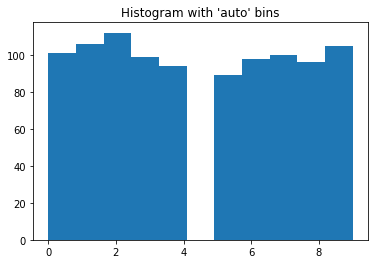

[0.987 1.183 0.167 0.824 0.836 0.959 0.683 0.886 0.085 0.297 0.    0.051
 1.018 0.449 1.606 0.702 0.718 0.716 0.894 0.   ]
[0.55030083 0.61278952 0.39129401 0.52251699 0.51875235 0.94091392
 0.48219394 0.58737041 0.2788817  0.53552871 1.         0.21999773
 0.69258646 0.50734505 0.84306821 0.45737949 0.44997333 0.7920505
 0.66840407 1.        ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn import preprocessing

get_ipython().run_line_magic('matplotlib', 'inline')

def unpickle(file):
	import pickle
	with open(file, 'rb') as fo:
		dict = pickle.load(fo, encoding='bytes')
	return dict

def get_data_from_file(file):
	dict = unpickle("C:/ProgramData/cifar-10/cifar-10-batches-py/"+file)
	print("Unpacking {}".format(dict[b'batch_label']))
	X = np.asarray(dict[b'data'].T).astype("uint8")
	Yraw = np.asarray(dict[b'labels'])
	Y = np.zeros((10,10000))
	for i in range(10000):
		Y[Yraw[i],i] = 1
	names = np.asarray(dict[b'filenames'])
	return X,Y,names

def get_data():
	x_train = np.empty((3072,0)).astype("uint8")
	y_train = np.empty((10,0))	
	n_train = np.empty(0)
	for b in range(1,6):
		fn = 'data_batch_' + str(b)
		X, Y, names = get_data_from_file(fn)
		x_train= np.append(x_train, X, axis=1)
		y_train= np.append(y_train, Y, axis=1)		
		n_train= np.append(n_train, names)	
	del X, Y

	fn = 'test_batch'
	x_test, y_test, n_test = get_data_from_file(fn)
	return	x_train, y_train, n_train, x_test, y_test, n_test 

def get_label_names(file):
	dict = unpickle("C:/ProgramData/cifar-10/cifar-10-batches-py/"+file)
	L = np.asarray(dict[b'label_names'])
	return L

def visualize_image(X,Y,names, label_names, id):
	rgb = X[:,id]
	#print(rgb.shape)
	img = rgb.reshape(3,32,32).transpose([1, 2, 0])
	#print(img.shape)
	plt.imshow(img)
	plt.title("%s%s%s" % (names[id], ', Class = ', label_names[np.where(Y[:,id]==1.0)]) )
	plt.show()
	#dir = os.path.abspath("output/samples")
	#plt.savefig(dir+"/"+names[id].decode('ascii'))

print("Starting ...")
L = get_label_names('batches.meta')
x_train, y_train, n_train, x_test, y_test, n_test  = get_data()
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('n_train.shape = ', n_train.shape)
print('x_test.shape = ', x_test.shape)

#visualize_image(x_train,y_train,n_train, L, 43000)
# print('X.shape = ', X.shape)
# print('Y.shape = ', Y.shape)
# visualize_image(X,Y,names,1000)
print('Done.')


# In[10]:


# Randomly select N = ? training samples
N = 1000
mask = np.zeros(x_train.shape[1], dtype=int)
mask[:N] = 1
np.random.shuffle(mask)
mask = mask.astype(bool)
#plt.imshow(mask.reshape(250,200), cmap=plt.cm.gray)
#plt.show()

x_train = x_train[:, mask]
y_train = y_train[:, mask]
print('x_train.shape = ', x_train.shape)


# In[11]:


# Computign Features
# ==================


#sift_object = cv.xfeatures2d.SIFT_create(nfeatures = 10)
sift_object = cv.xfeatures2d.SIFT_create()
descriptors = np.empty((128,0))
labels = np.empty((10,0))
des_nums = np.zeros(N).astype(int)
for i in range(N):
	rgb = x_train[:,i]
	l = y_train[:,i]
	#print(l.reshape(10,1))
	#print(rgb.shape)
	img = rgb.reshape(3,32,32).transpose([1, 2, 0])
	img =  cv.cvtColor(img, cv.COLOR_BGR2GRAY)
	kp, des = sift_object.detectAndCompute(img, None)
	if des is not None:
		descriptors= np.append(descriptors, des.T, axis=1)
		labels = np.append(labels, np.tile(l.reshape(10,1), (1,des.shape[0])), axis=1)
		des_nums[i] = des.shape[0]
	else:
		des_nums[i] = 0


	# Displaying keypoints 
	# print("Keypoints = ", len(keypoints))
	# img= cv.drawKeypoints(img,keypoints, img)
	# for k in range(len(keypoints)): 
	# 	print(keypoints[k].pt)
	# plt.imshow(img, cmap=plt.cm.gray)
	# plt.show(block=False)
	# plt.pause(1)
print("Num. descriptors found = ", np.sum(des_nums))


# In[24]:




# k-means Clustring
# =================

#print(descriptors)	
#print(labels)
print(descriptors.shape)
print(np.sum(des_nums))
print(labels.shape)
K = 20 # Number of clusters in k-means
kmeans = KMeans(n_clusters=K, random_state=0).fit(descriptors.T)
print(len(kmeans.labels_))
#print(kmeans.labels_)

km_labels = kmeans.labels_
descriptor_histogram = np.zeros((N, K)).astype(int) # K = no. of k-means clusters, N = no. of images
des_count = 0
for i in range(N):
	n = des_nums[i]
	#for k in range(K):	
	#print(km_labels[des_count:des_count + n])
	for d in range(des_count, des_count + n):
		descriptor_histogram[i, km_labels[d]] += 1 
	des_count = n 

# print(descriptor_histogram[:,0])
# plt.bar(np.arange(K), descriptor_histogram[:,0])
# plt.show()
# plt.ion()
# for i in range(N):
# 	plt.bar(np.arange(K), descriptor_histogram[:,i])
# 	plt.title('Image %d, Class %s' % (i, L[np.where(y_train[:,i]==1.0)]))
# 	plt.pause(0.1)
# 	plt.clf()

# plt.ioff()    
# plt.show()

y = [np.where(r==1)[0][0] for r in y_train.T]
print(y)
plt.hist(y, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()


# In[27]:


# SVM Test

# Scaling
scaler = preprocessing.StandardScaler().fit(descriptor_histogram.astype(float))
print(scaler.mean_)                              
print(scaler.scale_)                                       
descriptor_histogram = scaler.transform(descriptor_histogram.astype(float))                           


clf = svm.SVC(C=1000.0, gamma='scale', kernel='linear', decision_function_shape='ovr')
#clf = svm.SVC(C=0.9, gamma=1.0, kernel='rbf', decision_function_shape='ovr')
clf.fit(descriptor_histogram, y) 
ans = [clf.predict([descriptor_histogram[i,:]]) for i in range(N)]
#print(np.vstack(ans))
ans = np.vstack(ans).reshape(1,len(y))
print(ans - y)
print(np.sum((ans - y)==0))


# In[15]:


print(clf.gamma)
print(len(y))


# In[ ]:






In [ ]:
print(ans - y)
print(np.sum((ans - y)==0))

# Densely-Connected NN

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

from helpers import *
print(tf.__version__)

batch_size = 16
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Showing a few examples
show_image_examples(class_names, x_train, y_train)

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer=keras.optimizers.Adam(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test,  y_test, verbose=2)

model.summary()

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('\nHistory dict:', history.history)
    
plot_model_history(history)

# CNN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist


print(tf.__version__)

def show_image_examples(class_names, features, labels):
    print(len(class_names))
    num_classes = len(class_names)
    fig = plt.figure(figsize=(8, 3))
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        idx = np.where(labels[:] == i)[0]
        features_idx = features[idx, ::]
        img_num = np.random.randint(features_idx.shape[0])
        im = features_idx[img_num, ::]
        ax.set_title(class_names[i])
        plt.imshow(im)
    plt.show()

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['sparse_categorical_accuracy'])+1), 
                model_history.history['sparse_categorical_accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_sparse_categorical_accuracy'])+1), 
                model_history.history['val_sparse_categorical_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['sparse_categorical_accuracy'])+1),
                      len(model_history.history['sparse_categorical_accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),
                model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1), 
                model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),
                      len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()



batch_size = 16
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Showing a few examples
show_image_examples(class_names, x_train, y_train)

x_train, x_test = x_train / 255.0, x_test / 255.0

if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer=keras.optimizers.Adam(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test,  y_test, verbose=2)

model.summary()

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('\nHistory dict:', history.history)
    
plot_model_history(history)
